# Experiments on Probability Density Functions
### Main document (Figure 3)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd

import qclib.state_preparation.util.baa as baa

x = np.linspace(0, 20, 128) # discretization points
s = x[1]-x[0] # step unit
d = s * 0.5   # delta


In [3]:
perth_data = {}
pdf_names = ['lognormal']

for pdf in pdf_names:
    perth_data[pdf] = pd.read_csv(
        'data/'+pdf+'_jakarta_7qubits.txt', skiprows=2, header=None, delim_whitespace=True, index_col=[0],
        names=['max_fidelity_loss'] + [f'probability_measure_{i}' for i in range(2**7)]
    )

In [4]:
def plot_noisy(labels, averages, pdf_name, text):
    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(10, 10))
    for i, avg in enumerate(averages):
        y = avg
        x = np.linspace(0, 20, len(y))
        if i == 0: # ideal
            plt.plot(x, y, label=labels[i], linestyle=(0,(5,5)), color='black')
        else:
            plt.plot(x, y, label=labels[i])
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    plt.savefig(f'save/{pdf_name}{text}.pdf')
    plt.show()

In [9]:
def experiment_noisy(pmf, pdf_name, text):
    for row in perth_data[pdf_name].itertuples():
        labels = ['ideal', 'l='+str(row[0])]
        averages = [pmf, np.array(row)[1:]]

        plot_noisy(labels, averages, pdf_name, text)

# Log-normal

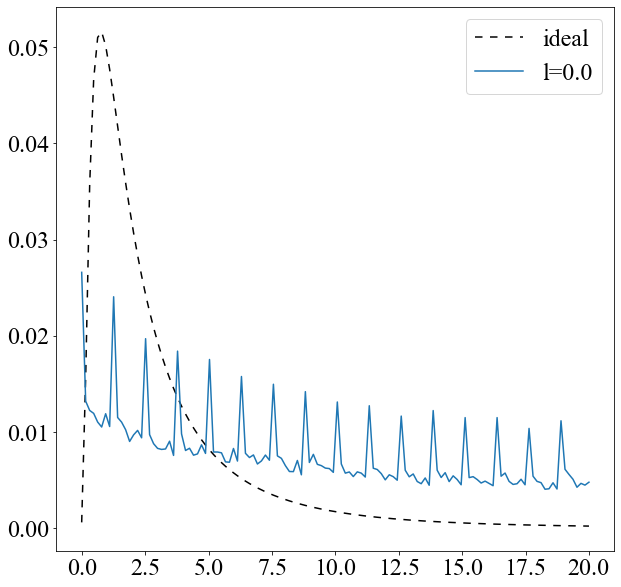

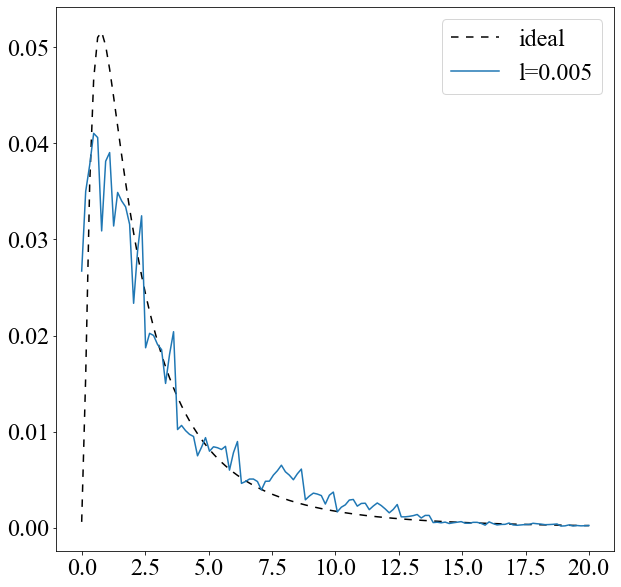

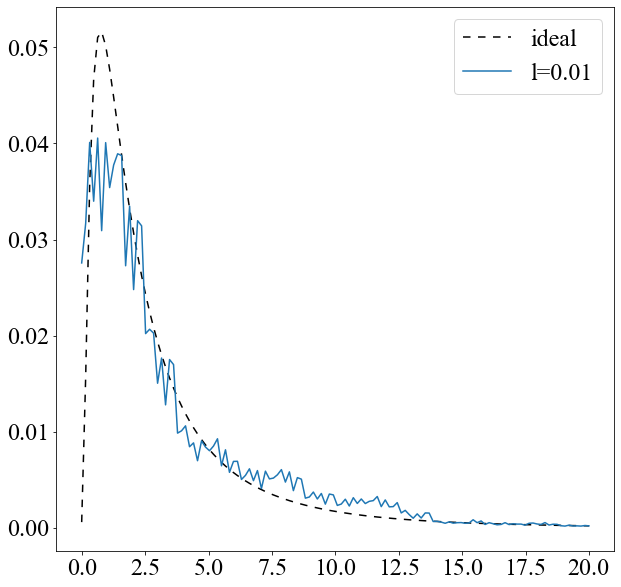

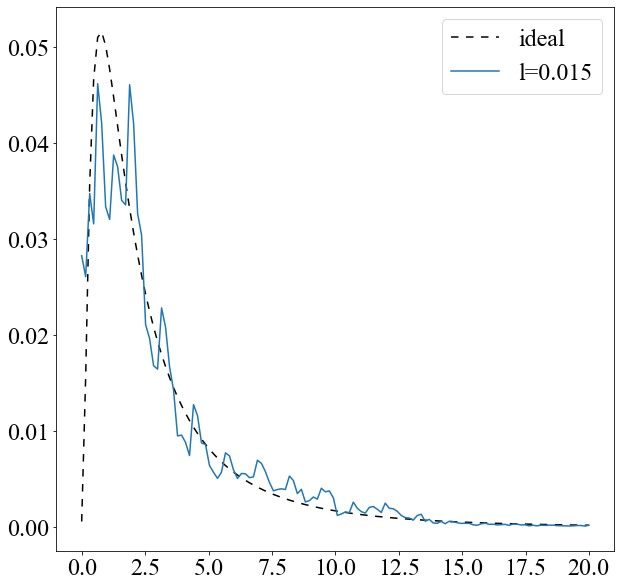

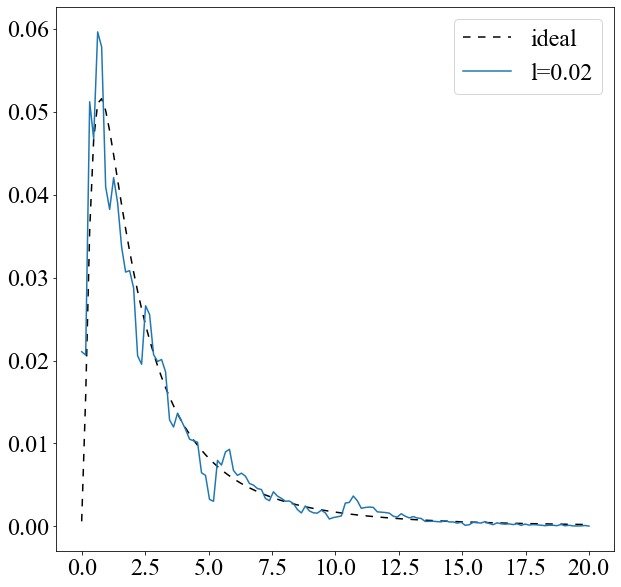

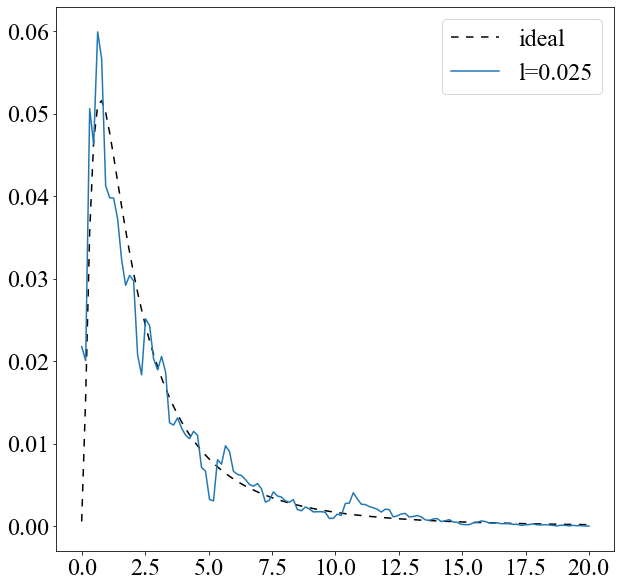

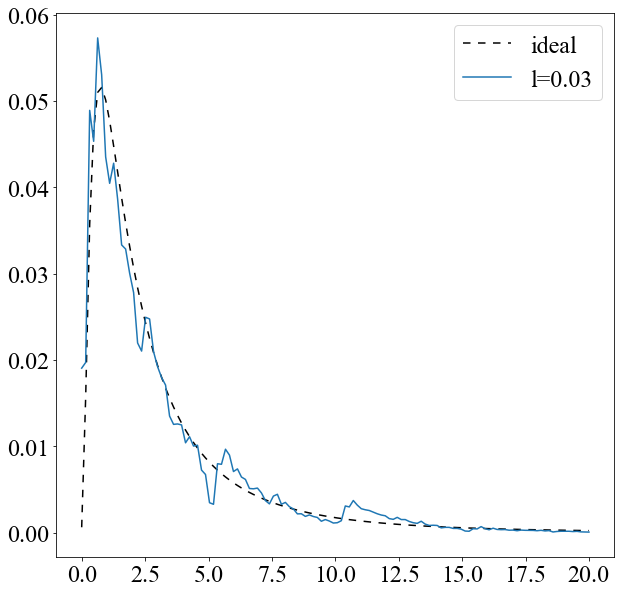

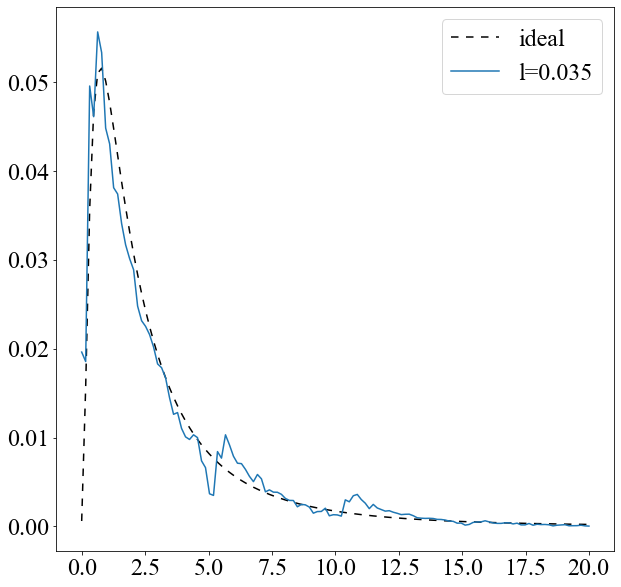

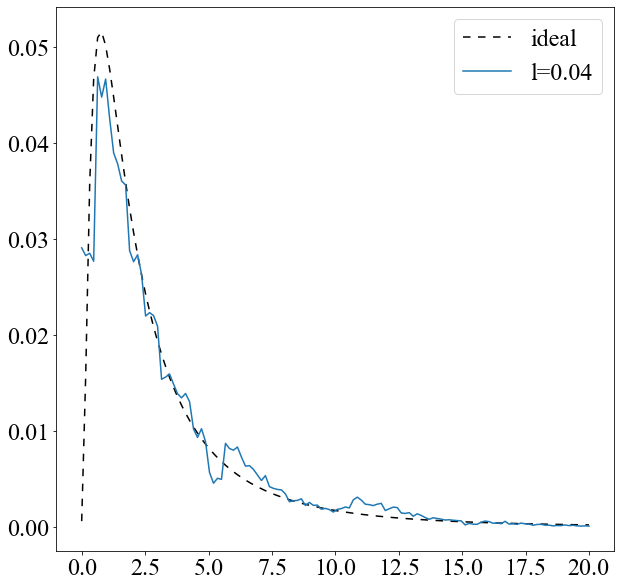

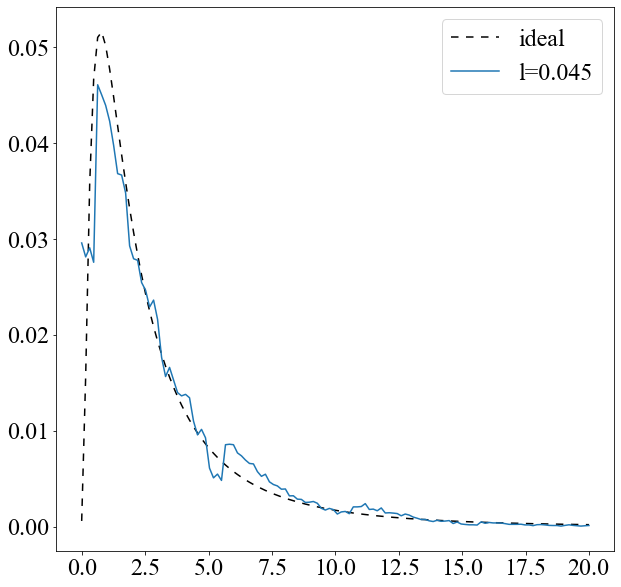

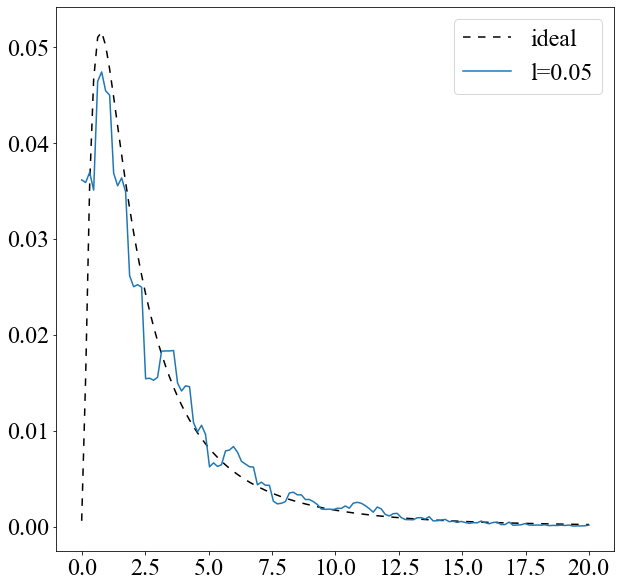

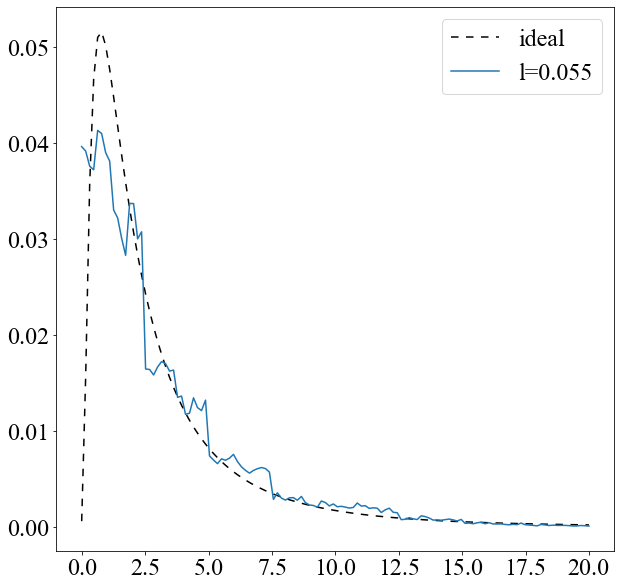

In [10]:
scale = 2

pdf_name = f'lognormal'
y = stats.lognorm.pdf(x, s=1, scale=scale)
cdf_plus = stats.lognorm.cdf(x+d, s=1, scale=scale)
cdf_minus = stats.lognorm.cdf(x-(s-d), s=1, scale=scale)

pmf = cdf_plus - cdf_minus

experiment_noisy(pmf, pdf_name, '_noisy')